In [138]:
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
from PIL import Image

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: 
## Matrícula: 

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [139]:
### Código da questão 1a.

def decimedSignal(signal, factor):
    decimedList = []
    
    for i in range(len(signal) - 1):
        if i%factor == 0:
            decimedList.append(signal[i])
    
    return np.array(decimedList)

x = np.array([1,2,10,0,1,2,10,0,1,2,10,0,1,2,10,0,1,2,10,0])
y = np.array([1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0])

print(decimedSignal(y,2))
print(len(decimedSignal(y,2)))

[1 1 1 1 1 1 1 1 1 1]
10


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [140]:
### Código da questão 1b.

def interpoledSignal(signal, factor):
    interpoledList = []
    
    for i in range(len(signal)*2):
        if i % factor == 0:
            interpoledList.append(signal[i//factor])
        else:
            interpoledList.append(interpoledList[i-1])
    
    return np.array(interpoledList)

print(interpoledSignal(decimedSignal(x,2),2))

[ 1  1 10 10  1  1 10 10  1  1 10 10  1  1 10 10  1  1 10 10]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Tamanho: 32 x 32


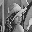

In [141]:
### Código da questão 1c.


im = Image.open("lena.bmp")
imagearray = np.array(im)


for _ in range(2): 
    imagearray = decimedSignal(imagearray,16)
    imagearray =  imagearray.transpose()

decimedImage = Image.fromarray(imagearray)

h, w = imagearray.shape
print(f'Tamanho: {h} x {w}')

decimedImage


## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

32
Tamanho: 512 x 512


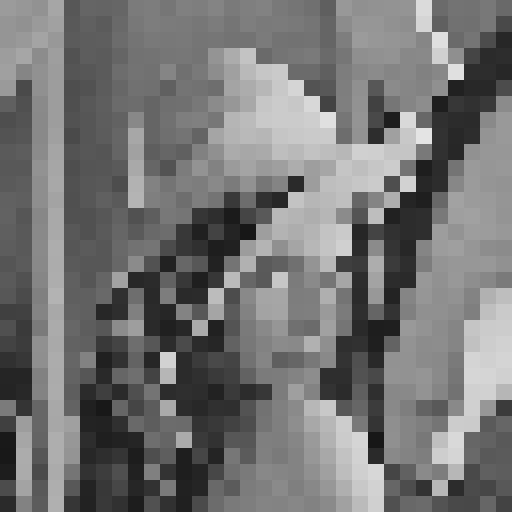

In [142]:
### Código da questão 1d.

imagearray = np.array(decimedImage)
print(len(imagearray)) 

for _ in range(8):
    imagearray = interpoledSignal(imagearray,2)
    imagearray = imagearray.transpose()
    
interpoledImage = Image.fromarray(imagearray)

h, w = imagearray.shape
print(f'Tamanho: {h} x {w}')

interpoledImage



# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [143]:
### Código da questão 2a.

## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

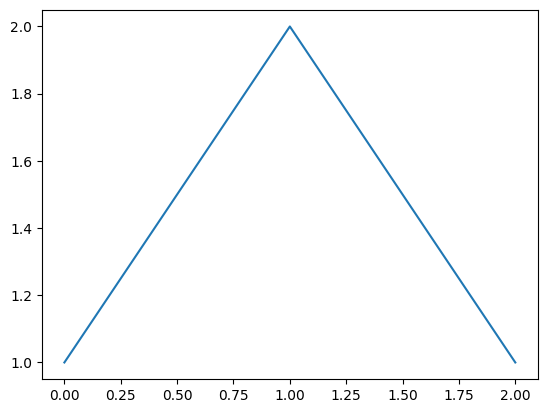

In [151]:
### Código da questão 2b.

plt.plot([1,2,1])

## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [145]:
### Código da questão 2c.

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

In [146]:
### Código da questão 2d.

## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

In [147]:
### Códgio da Questão 2e
sinal = sp.io.loadmat('data_projeto1.mat')['sinal'].ravel()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [148]:
### Código da questão 3a    

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

In [149]:
### Código da questão 3b